<a href="https://colab.research.google.com/github/hzy86/UWCourseWork/blob/master/EE%20447%20-%20Control%20System/Lecture_input_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ECE 447: Systems in Inputs and Outputs
===

Prof. Eric Klavins

&copy; 2019, University of Washington

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

# Uncomment in below Google colab to render sympy equations nicely
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

General Nonlinear Case
===

In general, a single input, single output (SISO) dynamical system has the form

\begin{align}
\dot \x & = f(\x, u)  \\
y & = g(\x, u)
\end{align}

where $u$ is the input and $y$ is the output. Note that $u$ is not exactly a variable. It is a yet-to-be-defined function of $y$. 

To linearize $f$ and $g$ we use the linear term in the Taylor expansion as before, but also include $f$, $g$, and $u$. 

$$
\dot\x \approx \left.\frac{\partial f}{\partial \x}\right|_{\begin{array}
 \;\x = {\bf 0} \\ 
 u = 0
\end{array}} + 
\left.\frac{\partial f}{\partial u}\right|_{\begin{array}
 \;\x = {\bf 0} \\ 
 u = 0
\end{array}}
$$

and

$$
y \approx \left.\frac{\partial g}{\partial \x}\right|_{\begin{array}
 \;\x = {\bf 0} \\ 
 u = 0
\end{array}} + 
\left.\frac{\partial g}{\partial u}\right|_{\begin{array}
 \;\x = {\bf 0} \\ 
 u = 0
\end{array}}
$$


The above partial derivatives evaluated at $\x = 0$ and $u=0$ are usually denoted by $A$, $B$, $C$, and $D$ as the linear system is written

\begin{align}
\dot \x & = A \x + B u \\
y & = C \x + D u .
\end{align}



*y is 1x1, x is nx1, u is a scalar, so c is 1xn, d is a scalar*

Example
---
As and example, we linearize the following system around the operating point $(0,0)$. 

$$
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2 \\
a \sin x_1 + b u \cos x_1
\end{pmatrix} .
$$

$$
y = x_1
$$

Using `sympy` we can find the $A$, $B$, $C$, and $D$ matrices.

In [0]:
var("x1 x2 a b u y")
f = Matrix([x2, a*sin(x1) + b*u*cos(x1)])
g = Matrix([x1])
pfpx = f.jacobian(Matrix([x1,x2]))
pfpu = f.jacobian(Matrix([u]))
pgpx = g.jacobian(Matrix([x1,x2]))
pgpu = g.jacobian(Matrix([u]))
A = pfpx.subs(x1,0).subs(x2,0).subs(u,0)
B = pfpu.subs(x1,0).subs(x2,0).subs(u,0)
C = pgpx.subs(x1,0).subs(x2,0).subs(u,0)
D = pgpu.subs(x1,0).subs(x2,0).subs(u,0)
A,B,C,D

⎛⎡0  1⎤  ⎡0⎤             ⎞
⎜⎢    ⎥, ⎢ ⎥, [1  0], [0]⎟
⎝⎣a  0⎦  ⎣b⎦             ⎠

In [0]:
A.eigenvals() # A defines a saddle point around (0,0) for every a != 0

{-√a: 1, √a: 1}

Solutions
===

Recall that the solution to 

$$
\dot \x = A \x
$$

is 

$$
\x(t) = e^{At}\x(0)
$$

What then is the solution to 

$$
\dot \x = A \x + B u ?
$$

To find $\x(t)$, we rearrange the above

$$
\dot \x - A \x = B u
$$

Then multiply by $e^{-At}$ to get

$$
e^{-At}(\dot \x - A \x) = e^{-At} B u
$$

As an aside, note that

\begin{align}
\frac{d}{dt} [ e^{-At} \x ] & = e^{-At} \dot x - A e^{-At} \x \\
 & = e^{-At} ( \dot x - A x )
\end{align}

So the previous equation is 

$$
\frac{d}{dt} [ e^{-At} \x ] = e^{-At} B u
$$

Itegrating both sides gives

\begin{align}
\left.e^{-At} \x \right|_{0}^t & = \int_0^t e^{-A\tau} B u(\tau) d \tau \\
& = e^{-At} \x(t) - x(0) = \int_0^t e^{-A\tau} B u d \tau 
\end{align}

Now we multiply move $\x(0)$ to the other side of the equation and multiply both sides by $e^{At}$ (which is the inverse of $e^{-At}$ to get

$$
\x(t) = e^{At}\x(0) + \int_0^t e^{A(t-\tau)} B u(\tau) d \tau 
$$

The first term is called the **natural response** and the second term is called the **forced response**.

*natural response - we get it anyways*

*forced response - we get by adding u*

Example
---

Consider the system

$$
\dot \x = \begin{pmatrix}
-1 & 0 \\
1 & -1
\end{pmatrix} \x + \begin{pmatrix}
0 \\
1
\end{pmatrix} u
$$

$$
y = ( 0 \; 1 ) \x
$$

and suppose that $u(t) = \mathrm{constant}$ (i.e. a constant input).

In [0]:
# First we compute the natural response
var("t x10 x20")
x0 = Matrix([x10,x20])
A = Matrix([
    [-1,0],
    [1,-1]
])
xnat = exp(A*t)*x0
xnat

⎡           -t      ⎤
⎢      x₁₀⋅ℯ        ⎥
⎢                   ⎥
⎢       -t        -t⎥
⎣t⋅x₁₀⋅ℯ   + x₂₀⋅ℯ  ⎦

In [0]:
# Then we compute the forced response
# We use the sympy method called integrate to do the calculus for us
var("u tau")
B = Matrix([[0],[1]])
xforced = integrate(exp(A*(t-tau))*B*u,(tau,0,t))
xforced

⎡    0    ⎤
⎢         ⎥
⎢       -t⎥
⎣u - u⋅ℯ  ⎦

In [0]:
# The complete response is the forced plus the natural
x = xnat + xforced
x

⎡                 -t            ⎤
⎢            x₁₀⋅ℯ              ⎥
⎢                               ⎥
⎢       -t          -t        -t⎥
⎣t⋅x₁₀⋅ℯ   + u - u⋅ℯ   + x₂₀⋅ℯ  ⎦

In [0]:
# Recall that y = C x is the output
C = Matrix([[0,1]])
y = C*x
y[0]

       -t          -t        -t
t⋅x₁₀⋅ℯ   + u - u⋅ℯ   + x₂₀⋅ℯ  

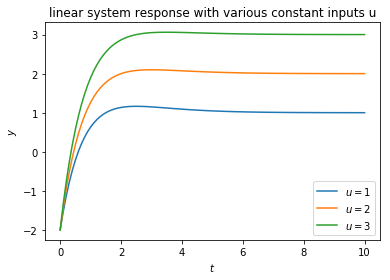

In [0]:
# Here, we plot the response with x(0) = (2,-2) using numpy
#
# Note that as t -> \infinity, we get that x -> Bu, which is Bu,
# and y = Cx -> CBu, which in this case is just u.
#
# So this system tracks its input u
# this is called a step response
#
tvals = np.linspace(0,10,100)
fyu1 = lambdify(t,y[0].subs(x10,2).subs(x20,-2).subs(u,1), modules=['numpy'])
fyu2 = lambdify(t,y[0].subs(x10,2).subs(x20,-2).subs(u,2), modules=['numpy'])
fyu3 = lambdify(t,y[0].subs(x10,2).subs(x20,-2).subs(u,3), modules=['numpy'])
plt.plot(tvals,fyu1(tvals), label="$u = 1$")
plt.plot(tvals,fyu2(tvals), label="$u = 2$")
plt.plot(tvals,fyu3(tvals), label="$u = 3$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("linear system response with various constant inputs u")
plt.legend();

In [0]:
# We can also figure out what happens when we input a sine wave, for example. 
# The system should track the size wave reasonably well.
var("w")
B = Matrix([[0],[1]])
u = sin(w*t)
xforced = integrate(exp(A*(t-tau))*B*u,(tau,0,t))
xforced

⎡           0           ⎤
⎢                       ⎥
⎢            -t         ⎥
⎣sin(t⋅w) - ℯ  ⋅sin(t⋅w)⎦

In [0]:
x = xnat + xforced
C = Matrix([[0,1]])
y = C*x
y[0]

       -t        -t               -t         
t⋅x₁₀⋅ℯ   + x₂₀⋅ℯ   + sin(t⋅w) - ℯ  ⋅sin(t⋅w)

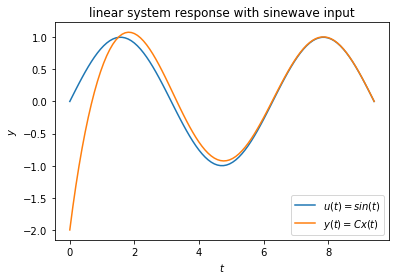

In [0]:
# the output tracks u after the initial transient reponse
# this is like a dream system
# in general we want such a system to track the input

tvals = np.linspace(0,3*np.pi,100)
fyu1 = lambdify(t,y[0].subs(x10,2).subs(x20,-2).subs(w,1), modules=['numpy'])
plt.plot(tvals,np.sin(tvals), label="$u(t) = sin(t)$")
plt.plot(tvals,fyu1(tvals), label="$y(t) = Cx(t)$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("linear system response with sinewave input")
plt.legend();

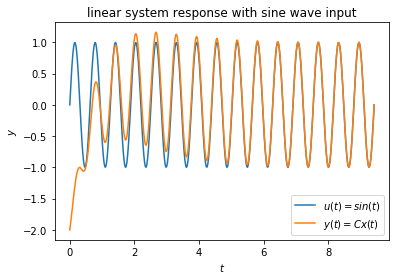

In [0]:
# With a faster sine wave, the system doesn't track as well
tvals = np.linspace(0,3*np.pi,400)
fyu1 = lambdify(t,y[0].subs(x10,2).subs(x20,-2).subs(w,10), modules=['numpy'])
plt.plot(tvals,np.sin(10*tvals), label="$u(t) = sin(t)$")
plt.plot(tvals,fyu1(tvals), label="$y(t) = Cx(t)$")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("linear system response with sine wave input")
plt.legend();

Nicer Code
===

Above, we wrote the same code over and over again. It would be nice to have a function that just plotted the response to an input once and for all for any $A$, $B$, $C$, and $D$. 

*We will get to these later in the course*

In [0]:
def simulate_system(A,B,C,D,u,x0=None,tmax=10):
    
    if not x0:
        x0 = Matrix(zeros(A.shape[0],1))  
    
    xnat = exp(A*t)*x0
    xforced = integrate(exp(A*(t-tau))*B*u,(tau,0,t))
    x = xnat + xforced
    y = C*x + D*u
    
    # Note that if u is a constant, then lambdify doesn't work! (known bug)
    # so we add a tiny bit of t to u so it looks like a function of t
    unp = lambdify(t,t/1000000000+u, modules=['numpy'])
    ynp = lambdify(t,re(y[0]), modules=['numpy'])
    
    tvals = np.linspace(0,tmax,100)
    plt.figure()
    plt.plot(tvals, unp(tvals),label="$u(t)$")    
    plt.plot(tvals, ynp(tvals),label="$y(t)$")
    plt.xlabel('$t$')
    plt.title("System response")
    plt.legend()
    return None

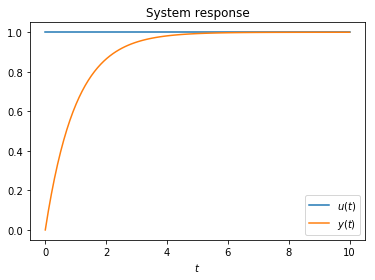

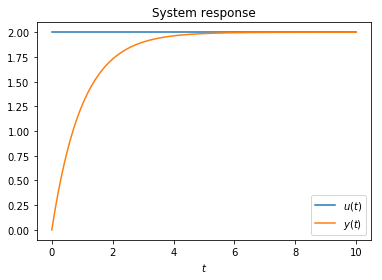

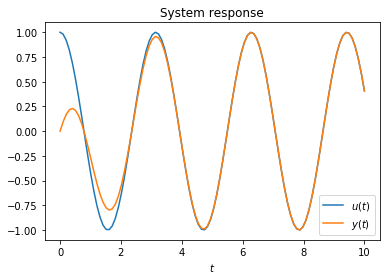

In [0]:
# Example
A = Matrix([[-1,0],[1,-1]])
B = Matrix([[0],[1]])
C = Matrix([[0,1]])
D = Matrix([[0]])
simulate_system(A,B,C,D,1)
simulate_system(A,B,C,D,2)
simulate_system(A,B,C,D,cos(2*t))

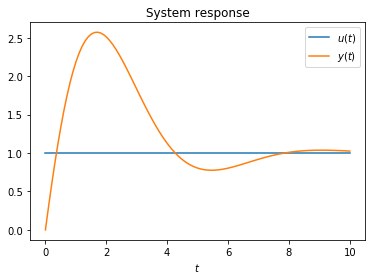

In [0]:
# Example: 3D system
A = Matrix([[-1,0,1],[0,-1,-1],[1,2,0]])
B = Matrix([[0],[1],[2]])
C = Matrix([[0,1,1]])
D = Matrix([[0]])
simulate_system(A,B,C,D,1)

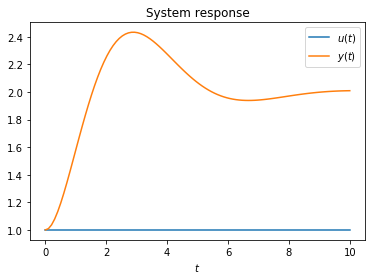

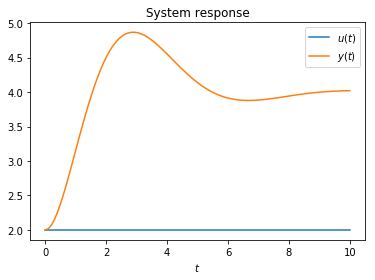

In [0]:
# Example: Nonzero D
A = Matrix([[-1,0,1],[0,-1,-1],[1,2,0]])
B = Matrix([[0],[1],[-1]])
C = Matrix([[0,1,1]])
D = Matrix([[1]])
simulate_system(A,B,C,D,1)
simulate_system(A,B,C,D,2)